## 10-2 transformer로 상품 설명 요약하기!  
BART 사용해서 상품 설명을 요약해보자!

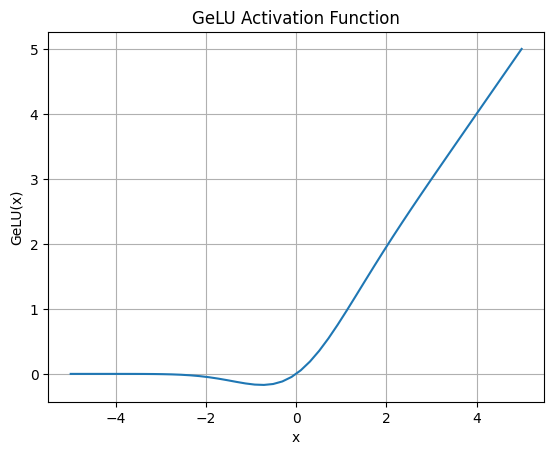

In [1]:
# BART에서 사용하는 활성화 함수는 GeLU이다! GeLU함수 그리기!
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5)
y = (1/2)*x*(1+np.tanh(np.sqrt(2/np.pi)*(x+0.044715*np.power(x,3))))
plt.plot(x,y)
plt.title("GeLU Activation Function")
plt.xlabel("x")
plt.ylabel("GeLU(x)")
plt.grid()
plt.show()

In [2]:
from transformers import pipeline

pipe = pipeline(task='summarization', device = 0)

e:\HongongML-DL_stduy\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
e:\HongongML-DL_stduy\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


e:\HongongML-DL_stduy\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dhson\.cache\huggingface\hub\models--sshleifer--distilbart-cnn-12-6. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cuda:0


In [3]:
pipe = pipeline(task='summarization', model='sshleifer/distilbart-cnn-12-6', device=0)

Device set to use cuda:0


In [4]:
sample_text = """Vincent Willem van Gogh was a Dutch Post-Impressionist painter who posthumously became one of the most famous and influential figures in Western art history. In a decade, he created about 2,100 artworks, including around 860 oil paintings, most of which date from the last two years of his life. They include landscapes, still lifes, portraits and self-portraits, and are characterised by bold colours and dramatic, impulsive and expressive brushwork that contributed to the foundations of modern art. Not commercially successful, he struggled with severe depression and poverty, eventually leading to his suicide at age thirty-seven.
Born into an upper-middle-class family, Van Gogh drew as a child and was serious, quiet, and thoughtful. As a young man, he worked as an art dealer, often traveling, but became depressed after he was transferred to London. He turned to religion and spent time as a Protestant missionary in southern Belgium. He drifted in ill health and solitude before taking up painting in 1881, having moved back home with his parents. His younger brother Theo supported him financially, and the two kept a long correspondence by letter."""
pipe(sample_text)

[{'summary_text': ' Vincent Willem van Gogh was one of the most famous and influential figures in Western art history . In a decade, he created about 2,100 artworks, including around 860 oil paintings . Not commercially successful, he struggled with severe depression and poverty, leading to his suicide at age thirty-seven .'}]

In [5]:
kobart = pipeline(task='summarization', model='EbanLee/kobart-summary-v3', device=0)

e:\HongongML-DL_stduy\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dhson\.cache\huggingface\hub\models--EbanLee--kobart-summary-v3. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
You passed `num_labels=3` which is incompatible to the `id2label` map of length `2`.
You passed `num_labels=3` which

In [6]:
ko_text = """하나, ‘입문자 맞춤형 7단계 구성’을 따라가며 체계적으로 반복하는 탄탄한 학습 설계!
이 책은 데이터 분석의 핵심 내용을 7단계에 걸쳐 반복 학습하면서 자연스럽게 머릿속에 기억되도록 구성했습니다. [핵심 키워드]와 [시작하기 전에]에서 각 절의 주제에 대한 대표 개념을 워밍업하고, 이론과 실습을 거쳐 마무리에서는 [핵심 포인트]와 [확인 문제]로 한번에 복습합니다. ‘혼자 공부할 수 있는’ 커리큘럼을 그대로 믿고 끝까지 따라가다 보면 데이터 분석 공부가 난생 처음인 입문자도 무리 없이 책을 끝까지 마칠 수 있습니다!
둘, 실제로 일어날 법한 흥미로운 스토리에 담긴 문제를 직접 해결하며 익히는 ‘진짜’ 데이터 분석!
현장감 넘치는 스토리를 통해 데이터를 다루는 방법을 알려 주어 ‘파이썬’과 ‘데이터’가 낯설어도 몰입감 있는 학습을 할 수 있도록 구성했습니다. 이 책에서는 API와 웹 스크래핑을 통해 실제 도서관 데이터와 온라인 서점 웹사이트에서 데이터를 가져오는 등 내 주변에 있는 데이터를 직접 수집할 수 있는 방법을 가이드합니다. 또한 판다스, 넘파이, 맷플롯립 등 데이터 분석에 유용한 각종 파이썬 라이브러리를 활용해 보며 코딩 감각을 익히고, 핵심 통계 지식으로 기본기를 탄탄하게 다질 수 있습니다. 마지막에는 분석을 바탕으로 미래를 예측하는 머신러닝까지 맛볼 수 있어 데이터 분석의 처음부터 끝까지 제대로 배울 수 있습니다.
셋, ‘혼공’의 힘을 실어줄 동영상 강의와 혼공 학습 사이트 지원!
책으로만 학습하기엔 여전히 어려운 입문자를 위해 저자 직강 동영상도 지원합니다. 또한 학습을 하며 궁금한 사항은 언제든지 저자에게 질문할 수 있도록 학습 사이트를 제공합니다. 저자가 질문 하나하나에 직접 답변을 달아 주는 것은 물론, 관련 최신 기술과 정보도 얻을 수 있습니다. 게다가 혼자 공부하고 싶지만 정작 혼자서는 자신 없는 사람들을 위해 혼공 학습단을 운영합니다. 혼공 학습단과 함께하면 마지막까지 포기하지 않고 완주할 수 있을 것입니다.
▶ https://hongong.hanbit.co.kr
▶ https://github.com/rickiepark/hg-da
넷, 언제 어디서든 가볍게 볼 수 있는 혼공 필수 [용어 노트] 제공!
꼭 기억해야 할 핵심 개념과 용어만 따로 정리한 [용어 노트]를 제공합니다. 처음 공부하는 사람들이 프로그래밍을 어려워하는 이유는 낯선 용어 때문입니다. 그러나 어려운 것이 아니라 익숙하지 않아서 헷갈리는 것이므로, 용어나 개념이 잘 생각나지 않을 때는 언제든 부담 없이 [용어 노트]를 펼쳐 보세요. 제시된 용어 외에도 새로운 용어를 추가하면서 자신만의 용어 노트를 완성해가는 과정도 또 다른 재미가 될 것입니다."""

kobart(ko_text)

[{'summary_text': '이 책은 데이터 분석의 핵심 내용을 7단계에 걸쳐 반복 학습하면서 자연스럽게 머릿속에 기억되도록 구성했습니다. 현장감 넘치는 스토리를 통해 데이터를 다루는 방법을 알려 주어 ‘파이썬’과 ‘데이터’가 낯설어도 몰입감 있는 학습을 할 수 있도록 구성했습니다. 이 책에서는 API와 웹 스크래핑을 통해 실제 도서관 데이터와 온라인 서점 웹사이트에서 데이터를 가져오는 등 내 주변에 있는 데이터를 직접 수집할 수 있는 방법을 가이드합니다. 마지막으로 분석을 바탕으로 미래를 예측하는 머신러닝까지 맛볼 수 있어 데이터 분석의 처음부터 끝까지 제대로 배울 수 있습니다. 끝으로 꼭 기억해야 할 핵심 개념과 용어만 따로 정리한 [용어 노트]를 제공합니다. 새로운 용어를 추가하면서 자신만의 용어 노트를 완성해가는 과정도 재미가 될 것입니다.'}]

In [7]:
print(kobart.model.config)

BartConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "BartForConditionalGeneration"
  ],
  "attention_dropout": 0.0,
  "author": "EbanLee(rudwo6769@gmail.com)",
  "bos_token_id": 1,
  "classif_dropout": 0.1,
  "classifier_dropout": 0.1,
  "d_model": 768,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 3072,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 1,
  "do_blenderbot_90_layernorm": false,
  "dropout": 0.1,
  "dtype": "float32",
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 3072,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 6,
  "eos_token_id": 1,
  "extra_pos_embeddings": 2,
  "force_bos_token_to_be_generated": false,
  "forced_eos_token_id": 1,
  "gradient_checkpointing": false,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "init_std": 0.02,
  "is_encoder_decoder": true,
  "kobart_version": 2.0,
  "label2id

#### 텍스트 토큰화  
Tokenization은 텍스트를 토큰이라는 단위로 분할하는 과정이다. 중요한 점은 이런 토큰화를 LLM 모델 자체가 수행하지 않는다는 것이다.   
Transformer 모델의 구졸르 살펴보았듯 이 모델에는 텏트를 토큰으로 분할하는 구성 요소가 없다! 이 모델은 이미 텍스트가 토큰으로 분할되고  
각 토큰에 정수 아이디가 할당된 후 이 정수 리스트가 전달된다고 가정한다.  
tokenization을 수행하는 모델을 tokenizer라고 부르며 모델과 별도로 존재한다. 이를 일종의 전처리 과정으로 생각할 수 있지만 tokenizer는  
훈련 데이터로부터 최적의 어휘 사전을 학습하는 모델에 가깝다! 또한 token의 Embedding vector는 Tokenizaer에 있지 않고 LLM 모델의 임베딩 층에  
있다는 것을 기억해라! 그럼 토큰화에는 어떤 방법이 있을까? 공백을 기준으로 텍스트를 나누는 방법이 가장 간단하지만 이렇게 하면 훈련 데이터에  
등장하지 않는 단어의 경우는 학습하기 어렵다! 따라서 단어보다 더 작은 부분단어 토큰화 방식이 등장했으며 transformer 기반 LLM에서 널리 사용된다!  
대표적인 부분단어 토큰화 방법에는 BPE(Byte-Pair Encoding), WordPiece, Unigram, Sentencepiece가 있다!

#### BPE  
BPE는 먼저 각 단어를 문자 단위로 분해하여 어휘 사전에 추가한 후, 가장 많이 등장하는 순서대로 문자 쌍(또는 부분단어 쌍)을 찾아 병합한다.  
그리고 합쳐진 부분단어를 어휘 사전에 추가한다. 이 과정을 사전에 정의된 어휘 사전 크기에 도달할 때까지 계속 진행한다.  
BPE 알고리즘의 단점은 유니코드 문자를 처리할 때 생긴다. 이 글을 쓰는 시점에서 Unicode 문자의 개수는 154,998개 이다! 따라서 최악의 경우  
어휘 사전의 크기가 154,998개부터 시작하게 된다. 앞서 살펴본 BART 모델의 어휘 사전 크기가 50,625개 였던 것을 생각하면 매우 큰 값이다!  
어휘 사전의 크기가 크면 임베딩 층의 크기도 따라서 커지므로 모델 파라미터의 개수가 급격히 늘어나게 된다. 따라서 적절한 수준의 어휘 사전 크기에서  
유니코드를 처리할 수 있는 방법이 필요하다! 이를 위해 등장한 것이 바로 byte 수준의 BPE 알고리즘이다!  
byte 수준의 BPE에서는 텍스트를 바이트 스트림을 인식하고 자주 등장하는 바이트 쌍을 어휘사전에 추가하는 식이다! 이렇게 하면 유니코드 문자도 바이트  
수준에서 병합하여 어휘사전에 추가할 수 있다. 앞서 살펴본 BART 모델이 바로 byte 수준의 BPE 알고리즘을 사용한다!

In [9]:
print(kobart.tokenizer.vocab_size)

30000


In [11]:
len(kobart.tokenizer)

30000

In [12]:
vocab = kobart.tokenizer.vocab
len(vocab)

30000

In [13]:
list(vocab.items())[:10]

[('朧', 4547),
 ('▁요', 14222),
 ('缓', 6640),
 ('선진', 26424),
 ('睾', 6033),
 ('後', 3823),
 ('돐', 9874),
 ('▁올라', 15189),
 ('news.com', 28534),
 ('강을', 23259)]

In [14]:
tokens = kobart.tokenizer.tokenize('혼자 만들면서 공부하는 딥러닝')
print(tokens)

['▁혼자', '▁만들', '면서', '▁공부', '하는', '▁', '딥', '러', '닝']


In [15]:
kobart.tokenizer.convert_tokens_to_ids(tokens)

[16814, 14397, 14125, 16962, 14049, 1700, 10021, 10277, 9747]

In [16]:
tokens_ids = kobart.tokenizer.encode('혼자 만들면서 공부하는 딥러닝')
print(tokens_ids)

[0, 16814, 14397, 14125, 16962, 14049, 1700, 10021, 10277, 9747, 1]


In [17]:
tokens = kobart.tokenizer.convert_ids_to_tokens(tokens_ids)
print(tokens)

['<s>', '▁혼자', '▁만들', '면서', '▁공부', '하는', '▁', '딥', '러', '닝', '</s>']


#### 워드피스  
워드피스는 토큰화는 BPE 토큰화와 매우 비슷하다. 먼저 훈련 데이터셋에 있는 모든 문자가 포함된 어휘 사전으로 시작해서 가장 많이 등장하는 부분단어 쌍을  
어휘 사전에 추가한다. BPE는 단순히 가장 많이 등장하는 부분단어를 선택하지만 워드피스는 부분단어를 구성하는 개별 토큰의 빈도도 고려한다!  
예를 들어, 'ab'토큰과 'cd'토큰의 빈도를 각각 10과 20이라면 BPE 알고리즘은 "cd"토큰을 먼저 어휘 사전에 추가한다. 하지만 워드피스는 "ab"토큰의 빈도를  
"a"와 "b" 토큰의 빈도로 나누고, 마찬가지로, "cd" 토큰의 빈도를 "c"와 "d"로 나누어 둘 중 큰 값을 가진 토큰을 어휘 사전에 추가한다!  
이런 방식 때문에 BPE 알고리즘으로 만든 어휘 사전과 조금 다른 어휘 사전을 구성하게 된다. 워드피스를 사용하는 대표적인 LLM으로는 인코더 기반의 BERT가 있다!  

#### 유니그램  
BPE나 워드피스와 달리 유니그램 토큰화에서는 초기에 매우 큰 어휘 사전을 만든 다음 사전에 지정한 어휘 사전 크기에 도달할 때 까지 점진적으로   
토큰을 제거한다. 초기 어휘 사전은 공백으로 나누어진 단어를 부분단어로 쪼개어 추가하거나 BPE 알고리즘을 적용하여 만든다!  
그 다음 어휘 사전에 있는 모든 토큰이 독립적이라 가정하고, 전체 손실을 가장 적게 증가시키는 토큰을 하나씩 삭제한다. 여기서 손실이란 각 토큰의  
등장 확률을 곱한 것에 음수를 취한 값이다! 그런데 작은 실숫값인 확률을 곱하는 대신 계산하기 쉬운 덧셈으로 바꾸기 위해 로그를 씌운다!  
즉, 손실은 음의 로그 확률 또는 음의 로그 가능도가 된다!!  
$-(P_1 \times P_2 \times ... \times P_n) \to -log(P_1 \times P_2 \times ... \times P_n) \to -(log P_1+ log P_2+...+log P_n)$  
이때 유니그램 토큰화는 단독으로 사용되지 않고 다음에 사용되는 센텐스피스와 함께 사용된다!

#### 센텐스피스  
지금까지 위에서 언급된 Tokenization은 모두 먼저 텍스트를 공백 등을 기준으로 단어로 나누어야 합니다! 보통 이런 단어 분할 과정을 사전 토큰화  
즉, pre-tokenization이라고 한다. 하지만 중국어와 같은 일부 언어의 경우 이런 방식이 통하지 않는다. 센텐스피스는 이런 사전 토큰화를 사용하지 않는  
방법으로 최신 언어 모델에서 널리 사용된다! 센텐스피스는 원시 입력 텍스트를 그대로 사용하며 공백을 하나의 문자로 간주한다. 센텐스피스는 알고리즘이자  
하나의 라이브러리 이며 실제 어휘 사전 구성은 BPE나 유니그램 알고리즘을 사용한다!  